In [407]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [428]:
pd.set_option('display.max_rows', 70)


In [409]:
latam_df = pd.read_csv("dataset_SCL.csv", dtype= {'Vlo-I': str, 'Vlo-O': str})

<h1>Initial data exploration</h1>

In [410]:
print("Shape of Dataframe:", format(latam_df.shape))
latam_df.head()

Shape of Dataframe: (68206, 18)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,ANO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1.0,1.0,2017.0,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2.0,1.0,2017.0,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3.0,1.0,2017.0,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4.0,1.0,2017.0,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5.0,1.0,2017.0,Jueves,I,American Airlines,Santiago,Miami


Preprocess of the data

General overview of the data

In [411]:
for col in latam_df:
    print("Column:", col, "- Unique values:", len(latam_df[col].unique()))


Column: Fecha-I - Unique values: 53271
Column: Vlo-I - Unique values: 582
Column: Ori-I - Unique values: 2
Column: Des-I - Unique values: 62
Column: Emp-I - Unique values: 31
Column: Fecha-O - Unique values: 62743
Column: Vlo-O - Unique values: 858
Column: Ori-O - Unique values: 2
Column: Des-O - Unique values: 61
Column: Emp-O - Unique values: 33
Column: DIA - Unique values: 32
Column: MES - Unique values: 13
Column: ANO - Unique values: 3
Column: DIANOM - Unique values: 8
Column: TIPOVUELO - Unique values: 3
Column: OPERA - Unique values: 24
Column: SIGLAORI - Unique values: 2
Column: SIGLADES - Unique values: 60


<p>Since Ori-I, ORI-O and SIGLAORI columns just have one unique value, they provide no information, so they get dropped.</p>
<p>Exploring AÑO and TIPOVUELO, we can see that in he case of ANO, the few rows that are not 2017 are flights programmed for 2017, so we drop this column aswell. 
We can drop the 39 columns of NaN in TIPOVUELO since they're filled with NaN fields.</p>
<p> We can also see that there's a clear correlation in SIGLADES and Des-O, since they're basically the same data, so we can drop one of these. In this case, we'll drop SIGLADES. </p>

In [412]:
latam_df.drop(labels=['Ori-I','SIGLAORI','ANO','Ori-O','SIGLADES'], axis=1,inplace=True)
latam_df.dropna(axis=0, subset=['TIPOVUELO'])

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1.0,1.0,Domingo,I,American Airlines
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2.0,1.0,Lunes,I,American Airlines
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3.0,1.0,Martes,I,American Airlines
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4.0,1.0,Miercoles,I,American Airlines
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5.0,1.0,Jueves,I,American Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SPJC,JAT,2017-12-22 15:41:00,400.0,SPJC,JAT,22.0,12.0,Viernes,I,JetSmart SPA
68202,2017-12-25 14:55:00,400,SPJC,JAT,2017-12-25 15:11:00,400.0,SPJC,JAT,25.0,12.0,Lunes,I,JetSmart SPA
68203,2017-12-27 14:55:00,400,SPJC,JAT,2017-12-27 15:35:00,400.0,SPJC,JAT,27.0,12.0,Miercoles,I,JetSmart SPA
68204,2017-12-29 14:55:00,400,SPJC,JAT,2017-12-29 15:08:00,400.0,SPJC,JAT,29.0,12.0,Viernes,I,JetSmart SPA


Now that we dropped the columns that we don't need, we can see the distribution of some of these columns. We're going to pay attention to the most interesting features

<Axes: xlabel='OPERA', ylabel='count'>

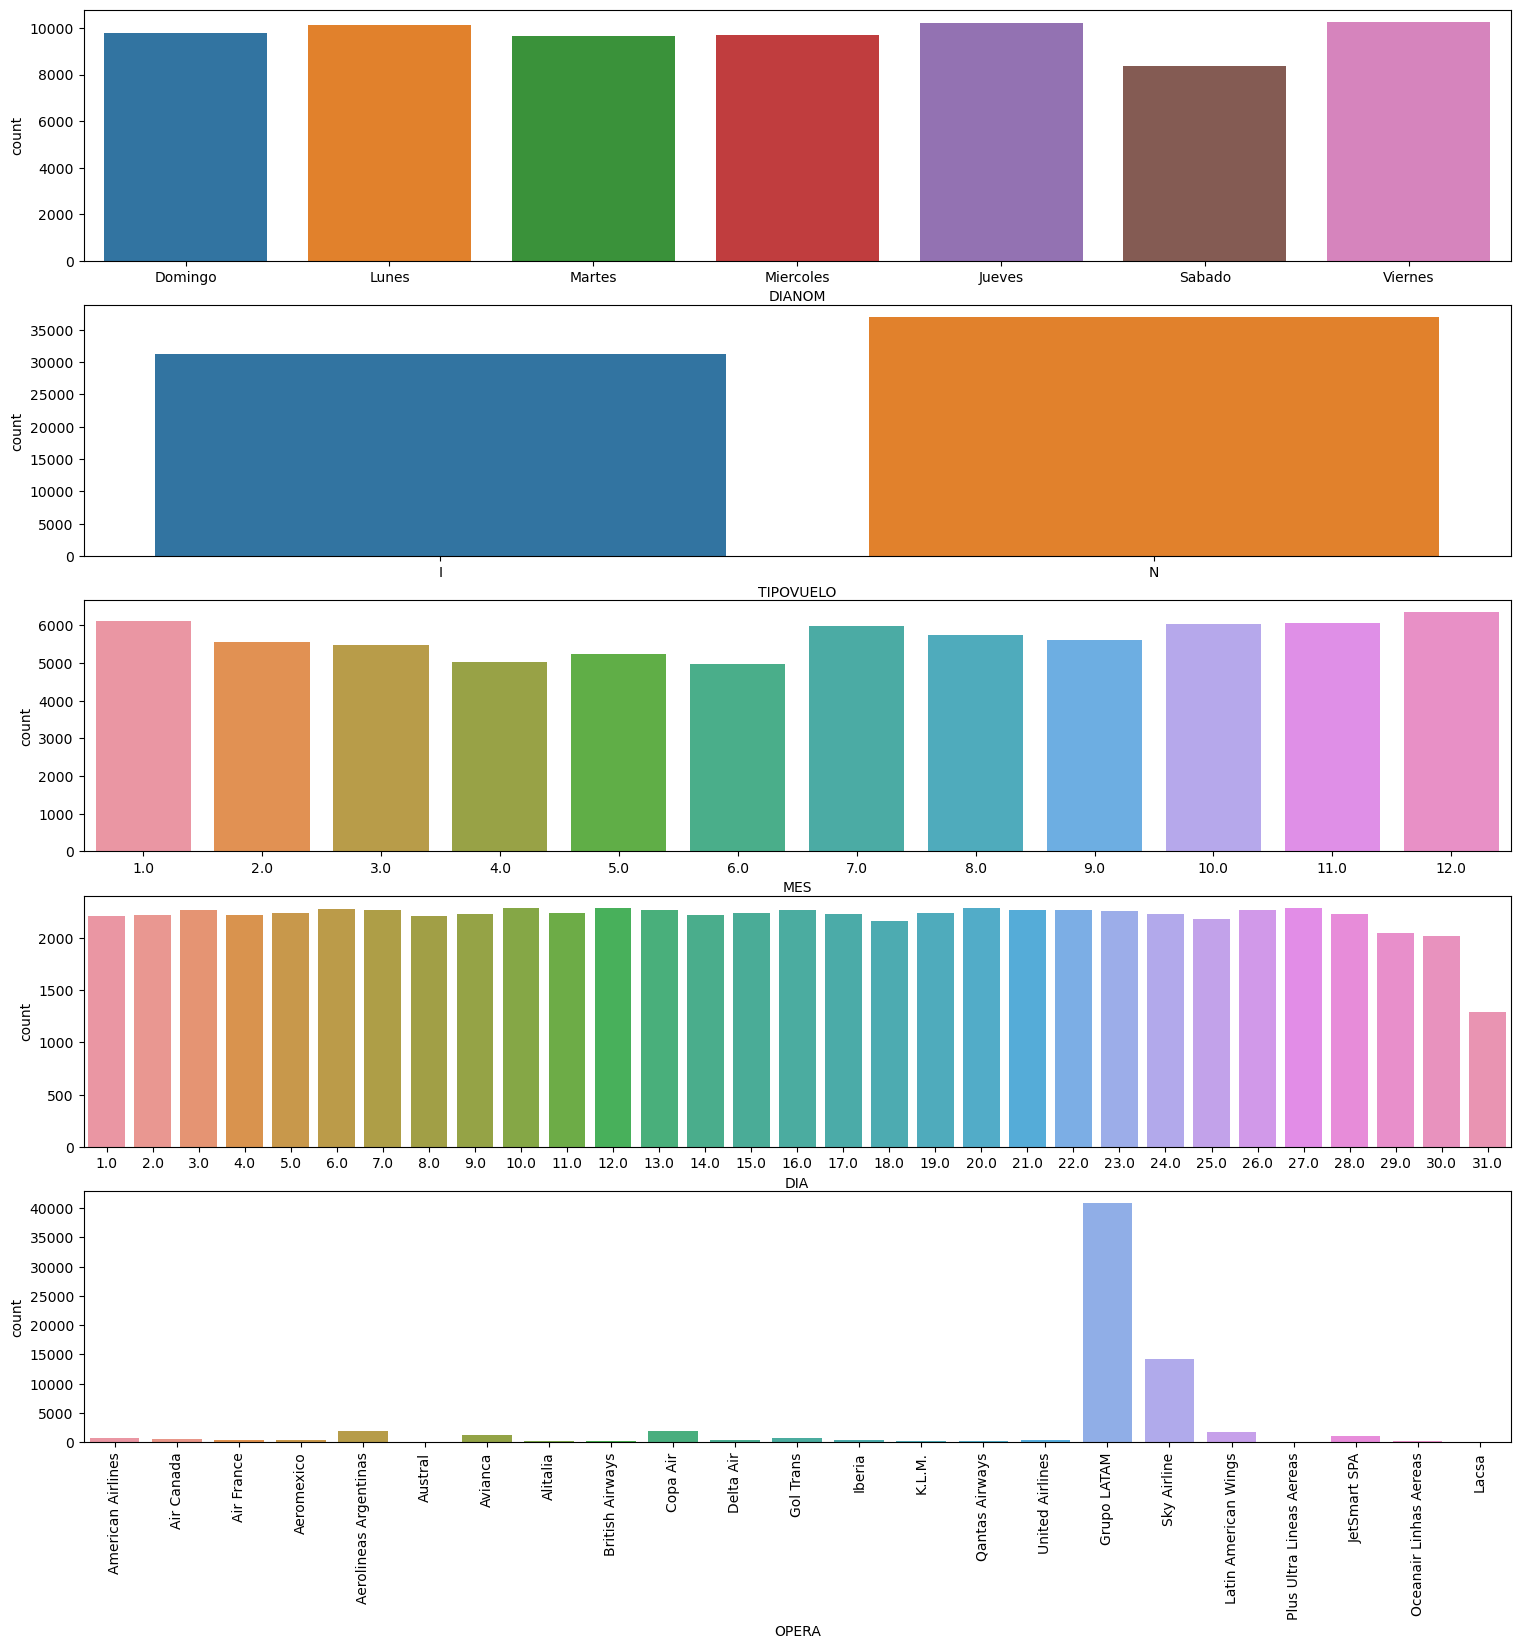

In [416]:
fig, ax =plt.subplots(5,1,figsize=(15, 15))
plt.xticks(rotation=90)
fig.tight_layout()
ax[4].tick_params(axis='x', rotation=90)
sns.countplot(x=latam_df["DIANOM"], ax=ax[0])
sns.countplot(x=latam_df["TIPOVUELO"], ax = ax[1])
sns.countplot(x=latam_df["MES"], ax = ax[2])
sns.countplot(x=latam_df["DIA"], ax = ax[3])
sns.countplot(x=latam_df["OPERA"], ax = ax[4])


We can see that the dataset is quite balanced, except for the Airline that operates, which is heavily skewed towards LATAM, Skyand Sky Airline. Which makes a lot of sense considering the Origin Airport is SCEL. This means that the data is very representative of the situation in SCEL airport, so the conclusions drawn from this dataset could apply to real life. 

Note that even though some features seem to be numeric (like month, day), they can be interpreted as categorical, since they have a set amount of values, and higher values do not necessarily mean anything to the model. This applies especially to columns that represent ID's, like Vlo-I or Vlo-O

Finally, for features such as Des-I that have high cardinality, we will reduce the cardinality, grouping the values that are infrequent to be able to see them more clearly in visual representations

<Axes: xlabel='Des-I', ylabel='count'>

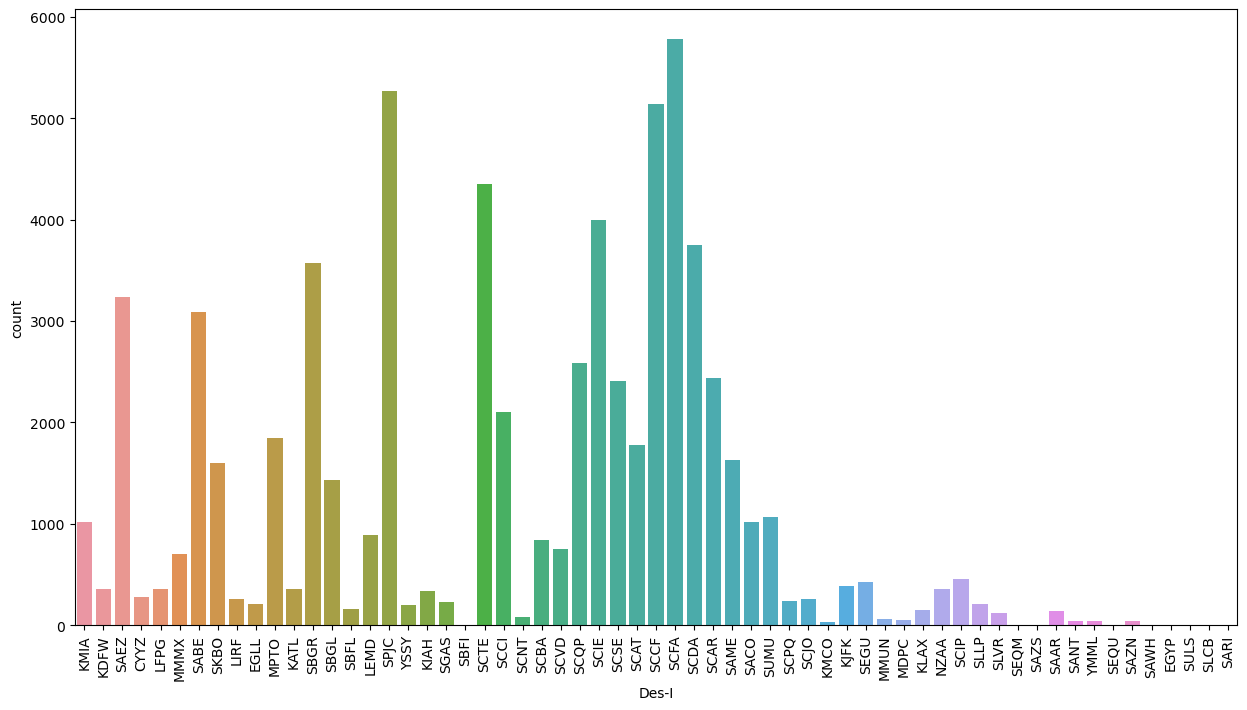

In [417]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x=latam_df["Des-I"])

Finally, we see the columns that contain null values. Since they're so few compared to the dataset, fixing them would not give a lot of value, so we drop them.

PS: In a real world scenario I would probably process these rows in order to make them work and split the data by commas, but because of time limitations I'll drop them.


In [418]:
latam_df[latam_df.isnull().any(axis=1)]

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA
6068,2017-01-19 11:00:00,200,SPJC,LAW,2017-01-19 11:03:00,NaN,SPJC,56R,19.0,1.0,Jueves,I,Latin American Wings
17059,"2017-03-08 06:20:00,1351,SCEL,SBCT,LAN,2017-03...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17060,"2017-03-06 14:20:00,1357,SCEL,SBCT,LAN,2017-03...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39316,"2017-08-10 20:15:00,8541,SCEL,SBCT,ONE,2017-08...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55332,"2017-10-03 08:00:00,7896,SCEL,SANU,LAN,2017-10...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55333,"2017-10-05 08:00:00,7896,SCEL,SANU,LAN,2017-10...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55334,"2017-10-06 08:10:00,7896,SCEL,SANU,LAN,2017-10...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55335,"2017-10-12 08:00:00,7896,SCEL,SANU,LAN,2017-10...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55336,"2017-10-13 08:10:00,7896,SCEL,SANU,LAN,2017-10...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55337,"2017-10-17 08:00:00,7896,SCEL,SANU,LAN,2017-10...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [419]:
latam_df.dropna(how='any', inplace=True)

<h1>2. Synthetic Column Generation</h1> 
<p> 1st step: Definition of functions </p>

In [420]:
#Parses Fecha-I as a datetime with given format and compares if its before march 3th or after dec 15
def is_high_season(row):
    date = datetime.strptime(row['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    if (date < datetime(2017, 3, 3) or date > datetime(2017,12,15)):
        return 1
    else:
        return 0
#Parses Fecha-I and Fecha-O as datetimes, calculates delta time and converts it to minutes
def get_time_diff(row):
    initial_date = datetime.strptime(row['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    actual_date = datetime.strptime(row['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    delta_time = actual_date - initial_date #returns delta time 
    return delta_time.total_seconds()/60 #converts to seconds and divide by 60 to get minutes

#self explanatory
def is_high_delay(row):
    return 1 if row['min_diff'] > 15 else 0 
 
#For simplicity, convert hour to elapsed seconds since day started and compare with the mentioned hours converted to seconds aswell
def get_period_day(row):
    initial_date = datetime.strptime(row['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    initial_time = initial_date.time()
    initial_time_seconds = initial_time.hour*60*60 + initial_time.minute*60
    if initial_time_seconds >= 5*60*60 and initial_time_seconds < 12*60*60:
        return 'morning'
    elif initial_time_seconds >= 12*60*60 and initial_time_seconds < 19*60*60:
        return 'afternoon'
    else:
        return 'night'

Applying the new functions to the dataframe

In [421]:
latam_df['high_season'] = latam_df.apply(is_high_season, axis=1)
latam_df['min_diff'] = latam_df.apply(get_time_diff, axis=1)
latam_df['delay_15'] = latam_df.apply(is_high_delay, axis=1)
latam_df['period_day'] = latam_df.apply(get_period_day, axis=1)

In [422]:
synthetic_features = ['high_season','min_diff','delay_15','period_day']
latam_df[synthetic_features].to_csv('synthetic_features.csv', index=False)

<h1>3. Delay rate behaviour 

In the case of features with high cardinality, we'll group the ones that are less frequent into a "other" group for a better visualization in the plots.

We'll set an arbitrary threshold to group them for each feature.

We'll set a threshold of 1%, so every value that is less than 1% in frequency will be classified as "other". Note that this will be just for data visualization, and the encoding will be done using the frequencies aswell.

In [454]:
high_cardinality_columns = ['Des-I', 'Emp-I', 'Des-O', 'Emp-O','OPERA']

for col in high_cardinality_columns:
    print(col + "\n")
    value_frequencies = latam_df[col].value_counts(normalize=True).mul(100).round(1)
    condition = value_frequencies < 1
    filtered_values = value_frequencies[condition].index
    mask_dict = dict.fromkeys(filtered_values, 'other')
    print("Previous cardinality:",len(latam_df[col].unique()))
    print("New cardinality",len(latam_df[col].replace(mask_dict).unique())) 
    print("\n")
    new_col = col + "_reduced"
    latam_df[new_col] = latam_df[col].replace(mask_dict)

Des-I

Previous cardinality: 61
New cardinality 26


Emp-I

Previous cardinality: 30
New cardinality 11


Des-O

Previous cardinality: 60
New cardinality 26


Emp-O

Previous cardinality: 32
New cardinality 13


OPERA

Previous cardinality: 23
New cardinality 10




In [452]:
latam_df

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,...,OPERA,high_season,min_diff,delay_15,period_day,Des-I_reduced,Emp-I_reduced,Des-O_reduced,Emp-O_reduced,OPERA_reduced
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1.0,1.0,...,American Airlines,1,3.0,0,night,KMIA,AAL,KMIA,AAL,American Airlines
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2.0,1.0,...,American Airlines,1,9.0,0,night,KMIA,AAL,KMIA,AAL,American Airlines
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3.0,1.0,...,American Airlines,1,9.0,0,night,KMIA,AAL,KMIA,AAL,American Airlines
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4.0,1.0,...,American Airlines,1,3.0,0,night,KMIA,AAL,KMIA,AAL,American Airlines
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5.0,1.0,...,American Airlines,1,-2.0,0,night,KMIA,AAL,KMIA,AAL,American Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SPJC,JAT,2017-12-22 15:41:00,400.0,SPJC,JAT,22.0,12.0,...,JetSmart SPA,1,46.0,1,afternoon,SPJC,JAT,SPJC,JAT,JetSmart SPA
68202,2017-12-25 14:55:00,400,SPJC,JAT,2017-12-25 15:11:00,400.0,SPJC,JAT,25.0,12.0,...,JetSmart SPA,1,16.0,1,afternoon,SPJC,JAT,SPJC,JAT,JetSmart SPA
68203,2017-12-27 14:55:00,400,SPJC,JAT,2017-12-27 15:35:00,400.0,SPJC,JAT,27.0,12.0,...,JetSmart SPA,1,40.0,1,afternoon,SPJC,JAT,SPJC,JAT,JetSmart SPA
68204,2017-12-29 14:55:00,400,SPJC,JAT,2017-12-29 15:08:00,400.0,SPJC,JAT,29.0,12.0,...,JetSmart SPA,1,13.0,0,afternoon,SPJC,JAT,SPJC,JAT,JetSmart SPA


We'll set an arbitrary threshold to group them for each feature.
We'll set a threshold of 1%, so every value that is less than 1% in frequency will be grouped as "other". Note that this will be just for data visualization, and the encoding will be done using the frequencies aswell.

<Axes: xlabel='Emp-O_reduced', ylabel='min_diff'>

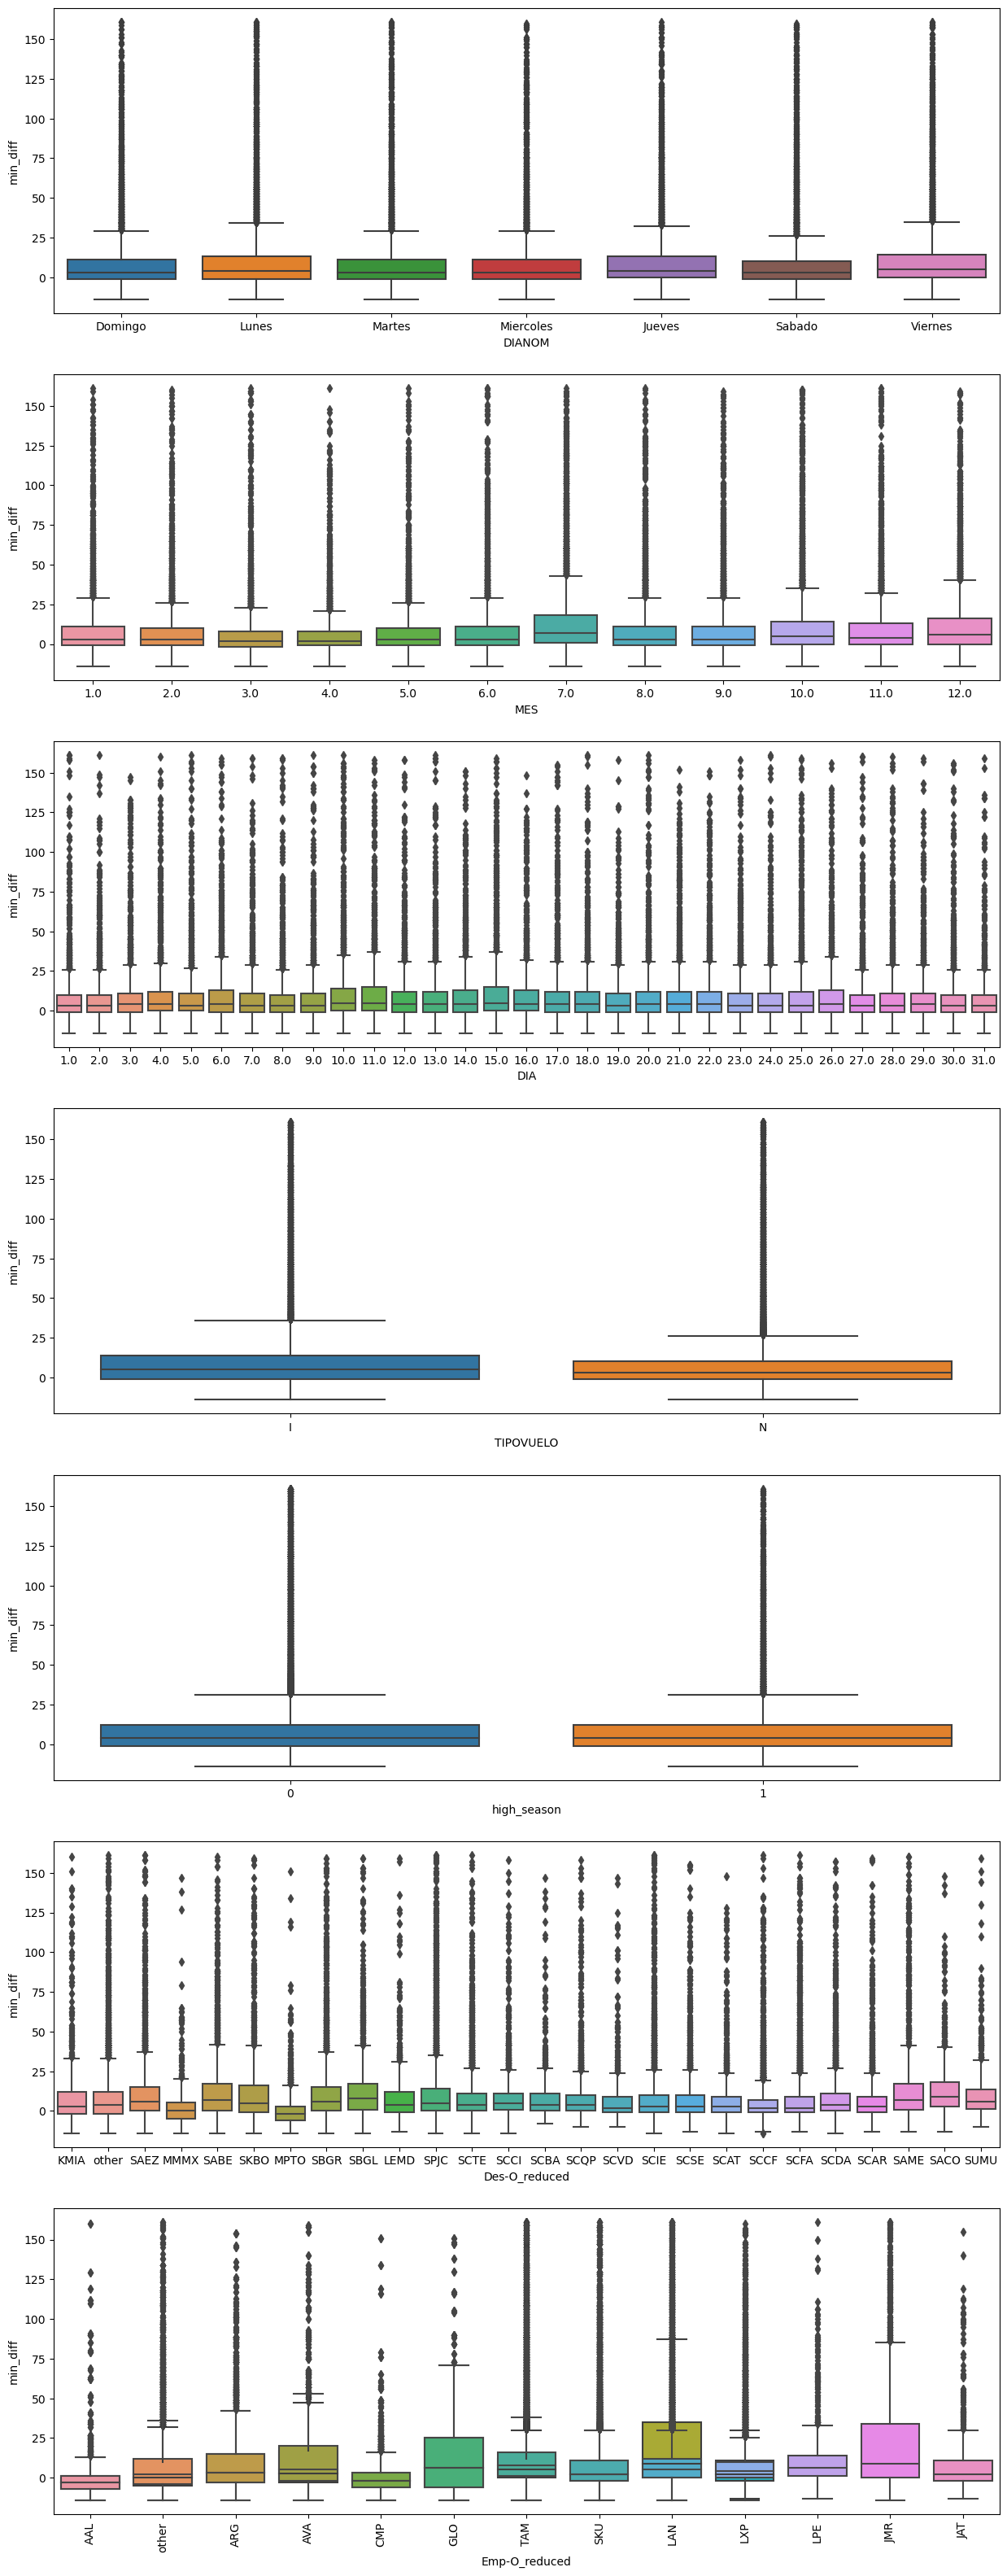

In [471]:
fig, ax =plt.subplots(7,1,figsize=(15, 40))
plt.xticks(rotation=90)
sns.boxplot(data=latam_df, x='DIANOM',y=latam_df['min_diff'], ax = ax[0])
sns.boxplot(data=latam_df, x='MES',y=latam_df['min_diff'], ax = ax[1])
sns.boxplot(data=latam_df, x='DIA',y=latam_df['min_diff'], ax = ax[2])
sns.boxplot(data=latam_df, x='TIPOVUELO',y=latam_df['min_diff'], ax = ax[3])
sns.boxplot(data=latam_df, x='high_season',y=latam_df['min_diff'], ax = ax[4])
sns.boxplot(data=latam_df, x='Des-O_reduced',y=latam_df['min_diff'], ax = ax[5])
sns.boxplot(data=latam_df, x='OPERA_reduced',y=latam_df['min_diff'], ax = ax[6])
sns.boxplot(data=latam_df, x='Emp-O_reduced',y=latam_df['min_diff'], ax = ax[6])